<a href="https://colab.research.google.com/github/IsidoraVarela/ProyectoWineQuality/blob/main/ProyectoTitulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# inicio

In [3]:
!pip install Boruta
!pip install scikit-optimize

In [4]:
!pip install shap

# Preprocesamiento de los datos

In [5]:
import pandas as pd

# Cargar los datos
file_path = '//content/winequality-red.csv'
wine_data = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset para entender su estructura
wine_data.head()

# Cargar los datos nuevamente, esta vez usando ';' como separador
wine_data = pd.read_csv(file_path, sep=';')

# Mostrar las primeras filas para una mejor comprensión
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Estadísticas descriptivas del conjunto de datos
wine_data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# Verificar si hay valores faltantes en el conjunto de datos
missing_values = wine_data.isnull().sum()
missing_values


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

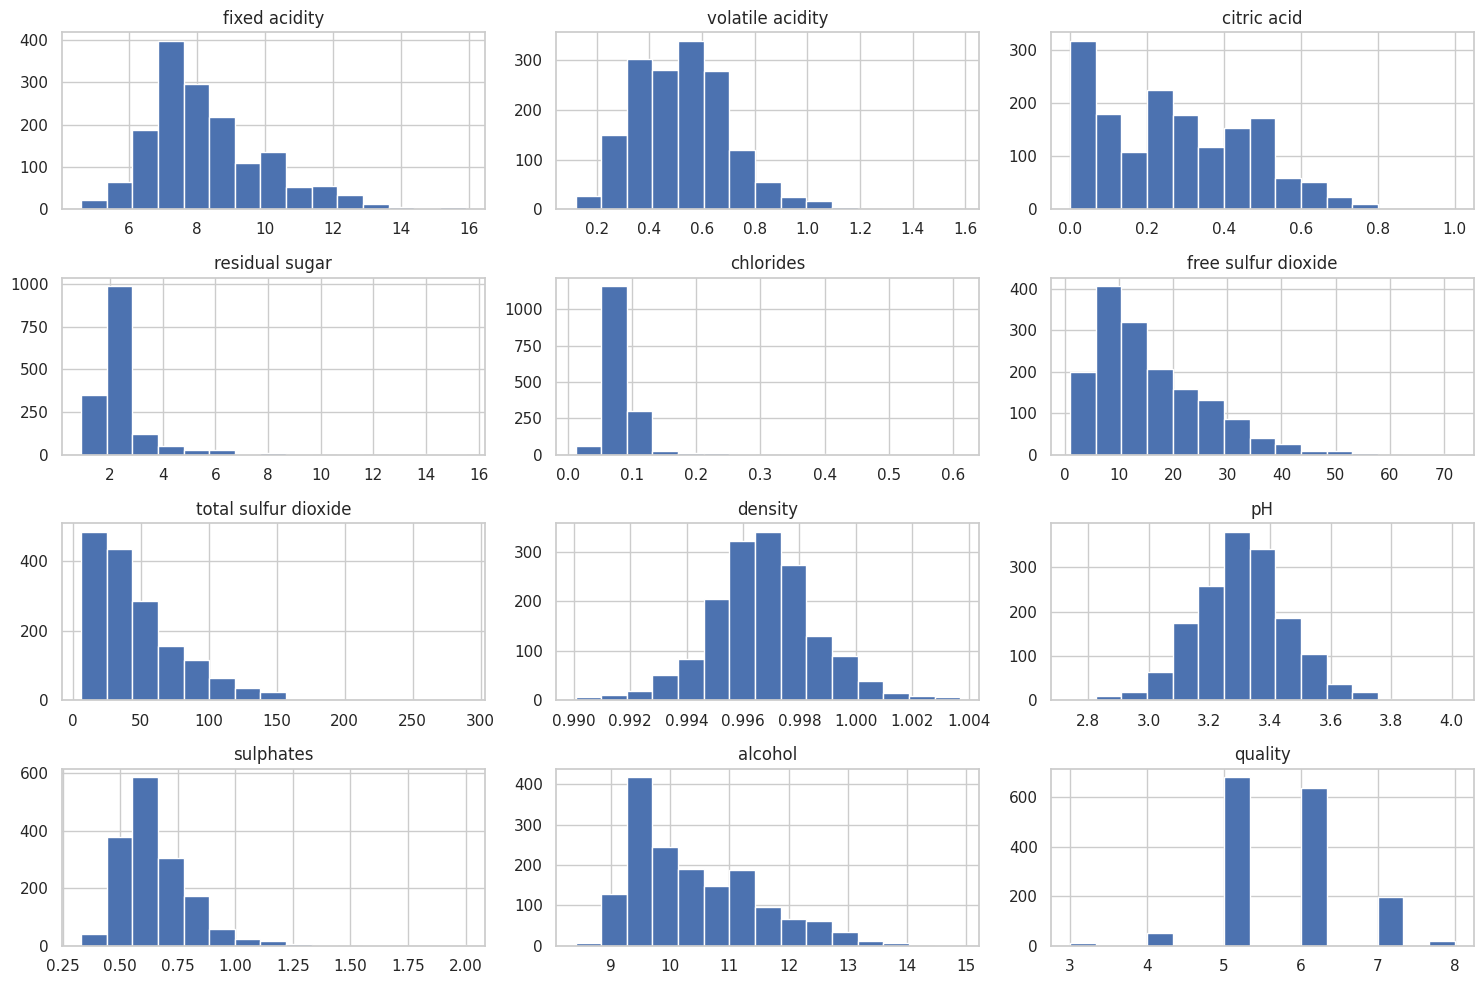

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para las visualizaciones
sns.set(style="whitegrid")

# Histogramas para cada variable
wine_data.hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.tight_layout()
plt.show()


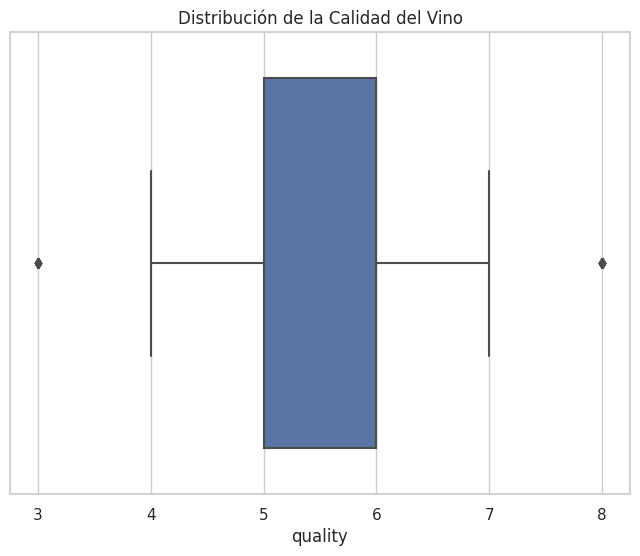

In [9]:
# Diagrama de caja para la variable 'Quality'
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', data=wine_data)
plt.title('Distribución de la Calidad del Vino')
plt.show()


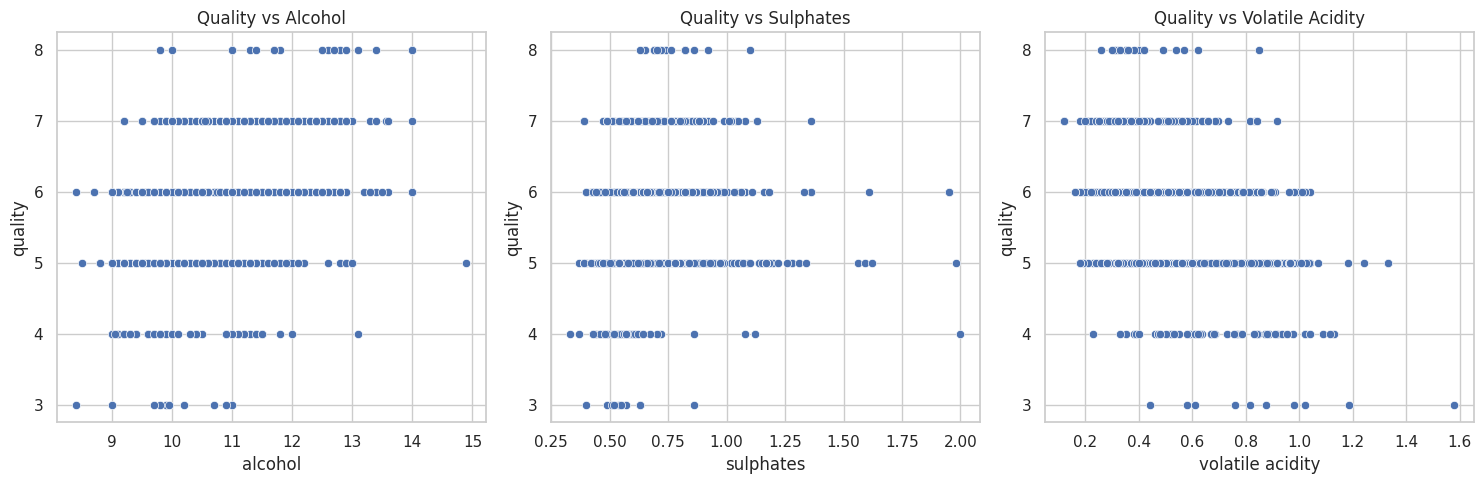

In [10]:
# Selección de variables para los diagramas de dispersión
variables = ['alcohol', 'sulphates', 'volatile acidity']

# Crear diagramas de dispersión
plt.figure(figsize=(15, 5))

for i, var in enumerate(variables):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=var, y='quality', data=wine_data)
    plt.title(f'Quality vs {var.title()}')

plt.tight_layout()
plt.show()


In [11]:
# Convertir la variable 'quality' a binaria
wine_data['quality'] = wine_data['quality'].apply(lambda x: 1 if x >= 6 else 0)

# Mostrar las primeras filas del conjunto de datos modificado
wine_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


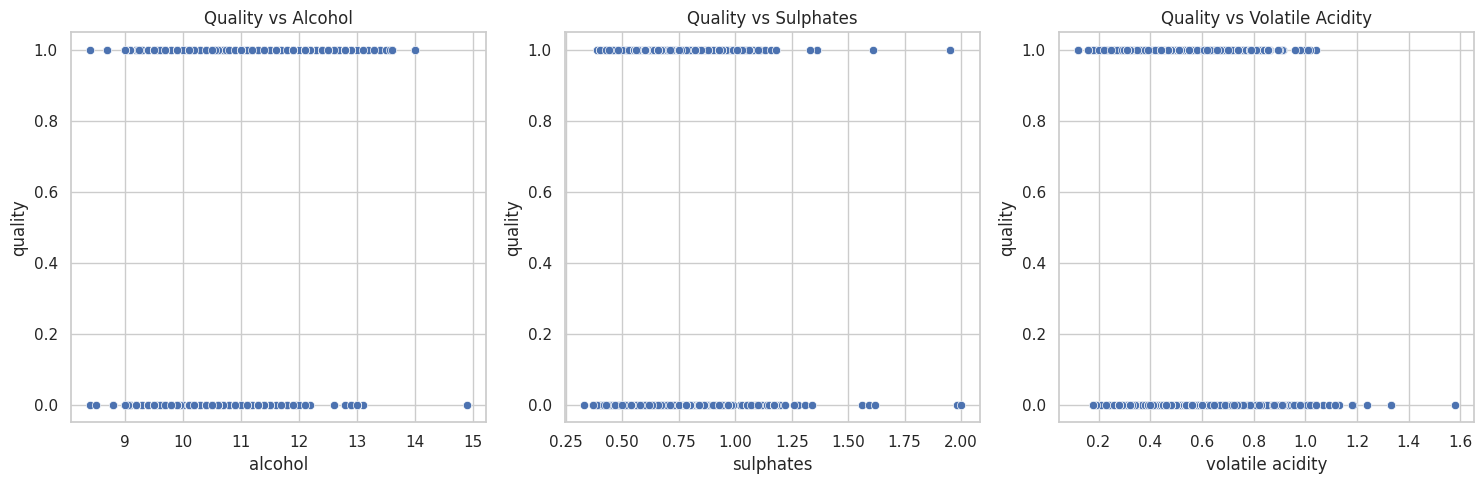

In [12]:
# Selección de variables para los diagramas de dispersión
variables = ['alcohol', 'sulphates', 'volatile acidity']

# Crear diagramas de dispersión
plt.figure(figsize=(15, 5))

for i, var in enumerate(variables):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=var, y='quality', data=wine_data)
    plt.title(f'Quality vs {var.title()}')

plt.tight_layout()
plt.show()


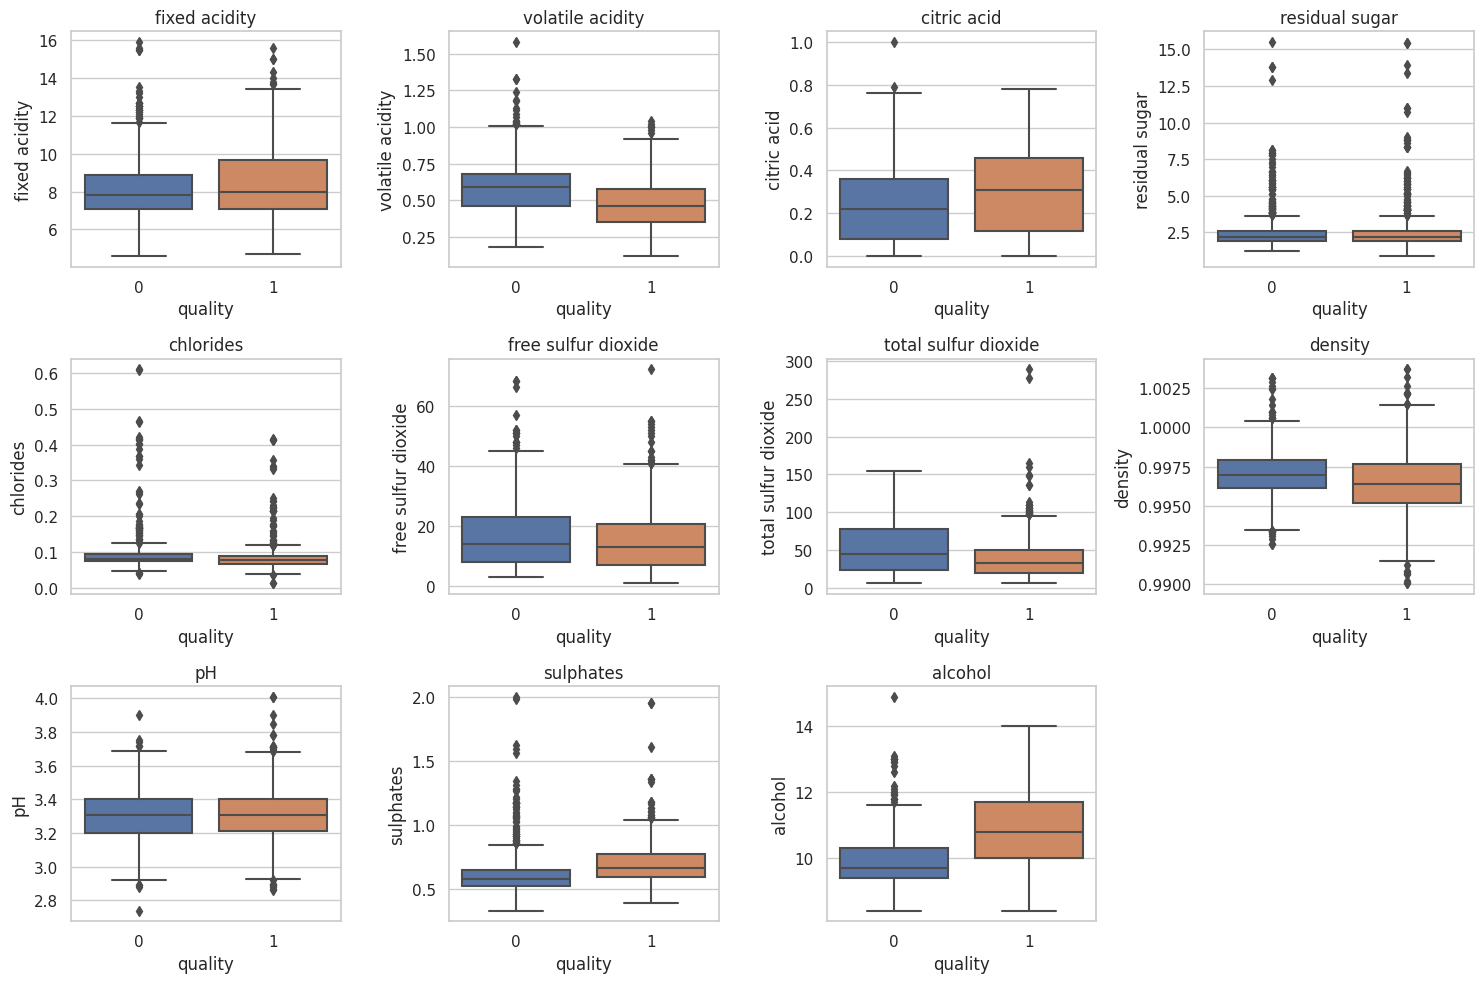

In [13]:
# Selección de variables para los diagramas de caja
variables_boxplot = wine_data.columns[:-1]  # Todas las características excepto 'quality'

# Crear diagramas de caja para cada variable con respecto a la calidad binaria
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables_boxplot):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x='quality', y=var, data=wine_data)
    plt.title(var)

plt.tight_layout()
plt.show()


## Normalización

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Crear el escalador Min-Max
scaler = MinMaxScaler()

# Seleccionar las características para la normalización (todas excepto 'quality')
features = wine_data.columns[:-1]

# Normalizar las características
data = wine_data.copy()
data[features] = scaler.fit_transform(wine_data[features])

# Mostrar las primeras filas del conjunto de datos normalizado
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0


<Axes: >

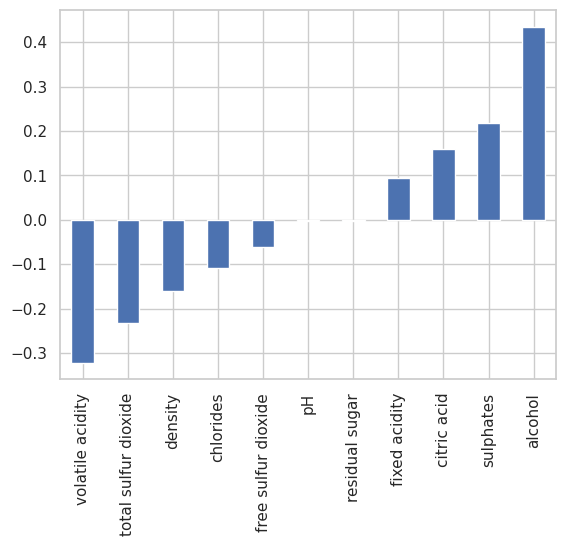

In [15]:
wine_data.corr()['quality'][:-1].sort_values().plot(kind='bar')

<Axes: xlabel='residual sugar', ylabel='alcohol'>

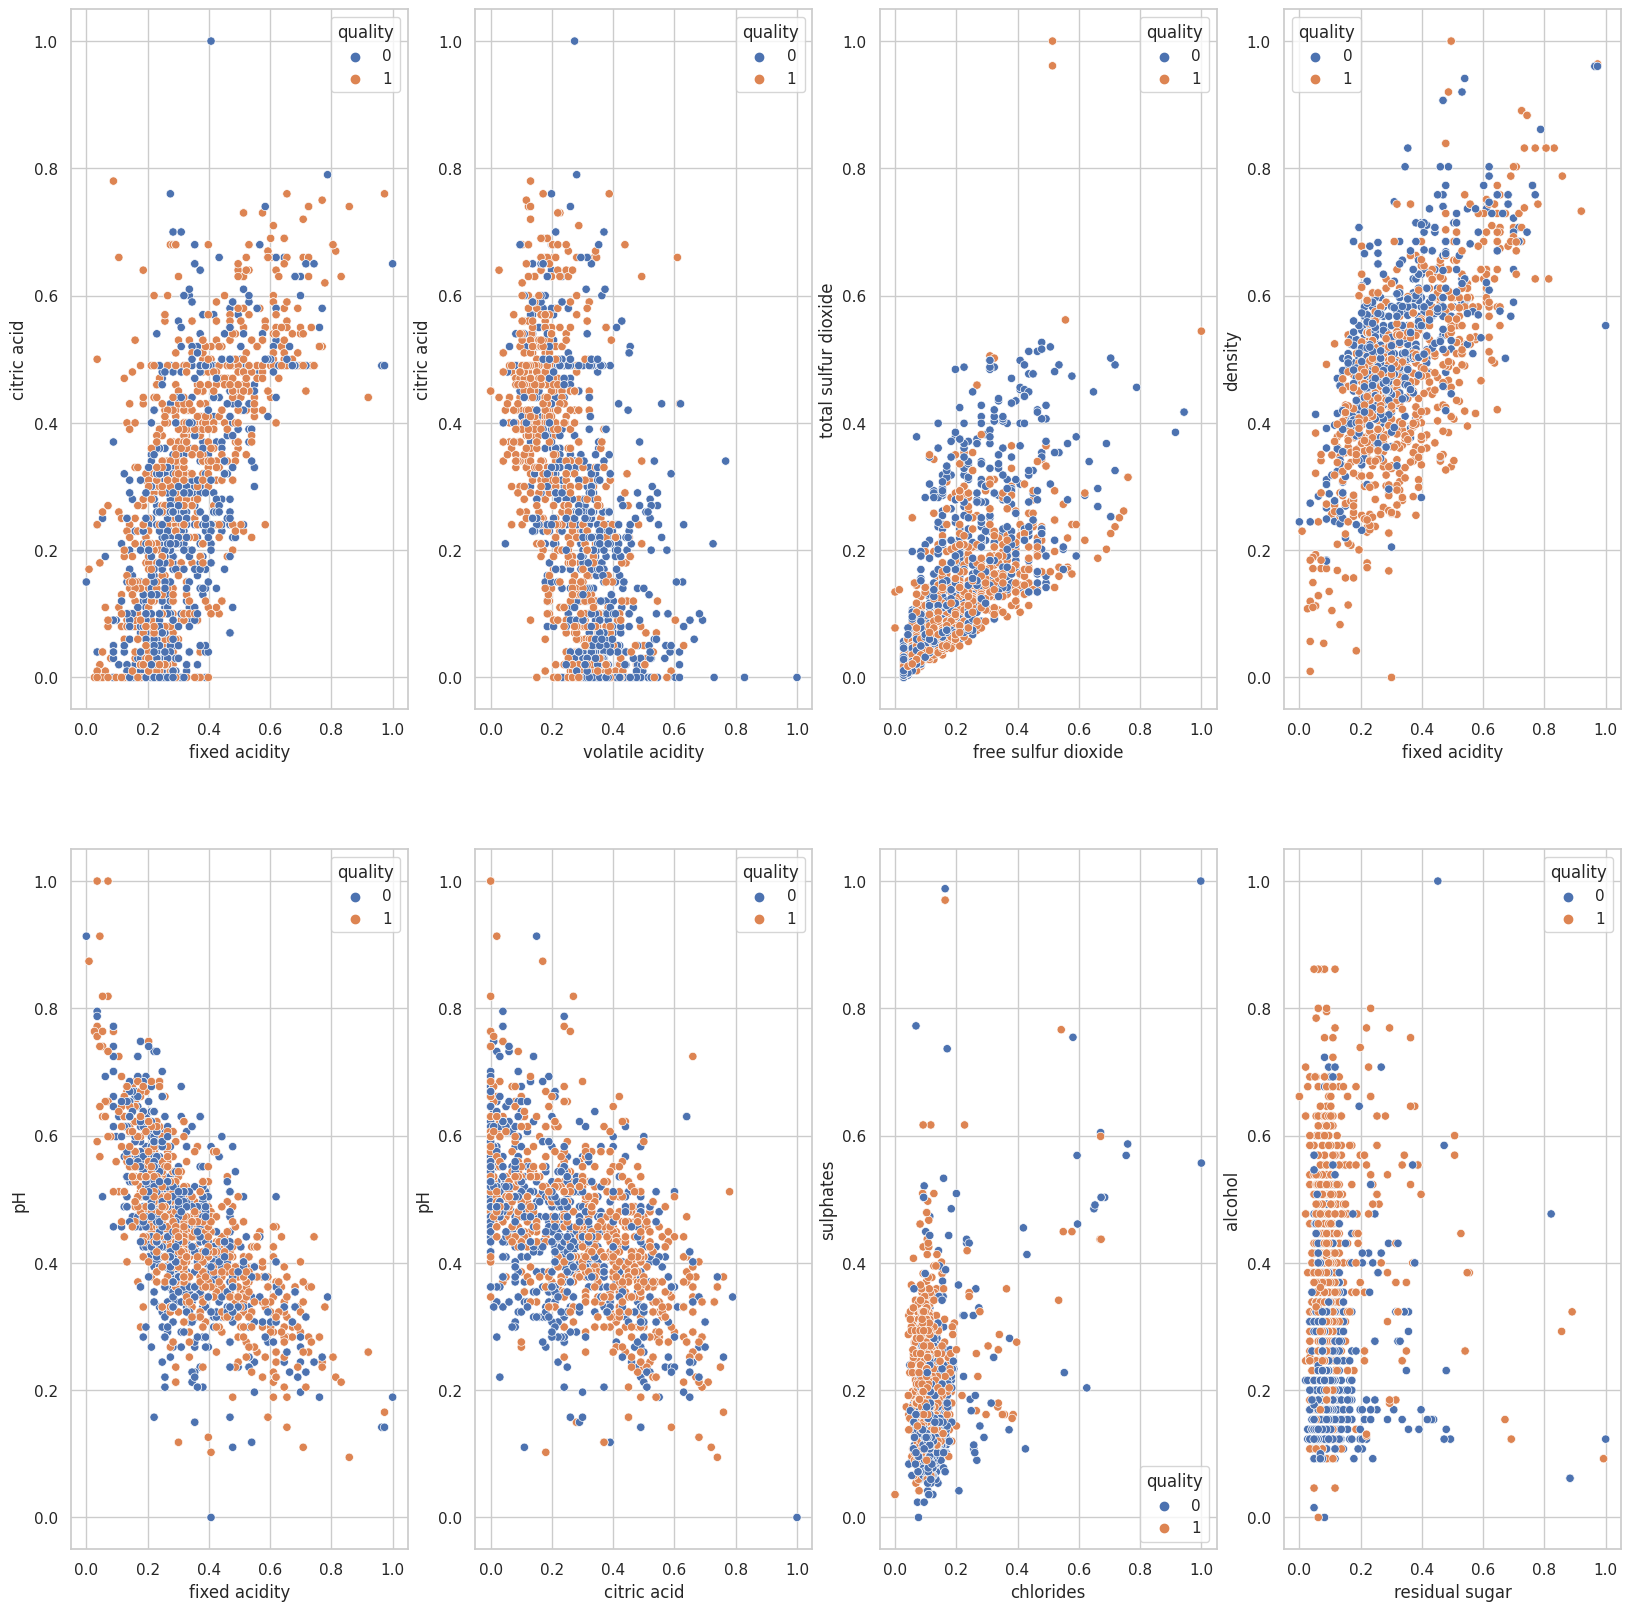

In [16]:
fig, ax = plt.subplots(2,4,figsize=(20,20))
sns.scatterplot(x = 'fixed acidity', y = 'citric acid', hue = 'quality', data = data, ax=ax[0,0])
sns.scatterplot(x = 'volatile acidity', y = 'citric acid', hue = 'quality', data = data, ax=ax[0,1])
sns.scatterplot(x = 'free sulfur dioxide', y = 'total sulfur dioxide', hue = 'quality', data = data, ax=ax[0,2])
sns.scatterplot(x = 'fixed acidity', y = 'density', hue = 'quality', data = data, ax=ax[0,3])
sns.scatterplot(x = 'fixed acidity', y = 'pH', hue = 'quality', data = data, ax=ax[1,0])
sns.scatterplot(x = 'citric acid', y = 'pH', hue = 'quality', data = data, ax=ax[1,1])
sns.scatterplot(x = 'chlorides', y = 'sulphates', hue = 'quality', data = data, ax=ax[1,2])
sns.scatterplot(x = 'residual sugar', y = 'alcohol', hue = 'quality', data = data, ax=ax[1,3])

# Prueba de algoritmos con caso base

## SVM

In [18]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, average_precision_score, f1_score
from sklearn.metrics import matthews_corrcoef


# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = data[features]
y = data['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo SVM
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
f1 = f1_score(y_test, y_pred)
sensitivity = tp / (tp + fn)  # Sensibilidad (Recall)
specificity = tn / (tn + fp)  # Especificidad
vpp = tp / (tp + fp)  # Valor Predictivo Positivo (Precision)
vpn = tn / (tn + fn)  # Valor Predictivo Negativo
mcc = matthews_corrcoef(y_test, y_pred)  # MCC
auroc = roc_auc_score(y_test, y_pred_proba)  # AUROC
auprc = average_precision_score(y_test, y_pred_proba)  # AUPRC

# Almacenar las métricas en un DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Confusion Matrix', 'Sensitivity', 'Specificity', 'VPP', 'VPN', 'MCC', 'AUROC', 'AUPRC'],
    'Value': [accuracy, conf_matrix, sensitivity, specificity, vpp, vpn, mcc, auroc, auprc]
})

metrics_df

# Imprimir métricas
#print(f"Accuracy: {accuracy:.4f}")
#print(f"Confusion Matrix:\n{conf_matrix}")
#print(f"F1 Score: {f1:.4f}")
#print(f"Sensitivity (Recall): {sensitivity:.4f}")
#print(f"Specificity: {specificity:.4f}")
#print(f"VPP (Positive Predictive Value): {vpp:.4f}")
#print(f"VPN (Negative Predictive Value): {vpn:.4f}")
#print(f"MCC (Matthews Correlation Coefficient): {mcc:.4f}")
#print(f"AUROC (Area Under the ROC Curve): {auroc:.4f}")
#print(f"AUPRC (Area Under the Precision-Recall Curve): {auprc:.4f}")


,Metric,Value
0,Accuracy,0.75
1,Confusion Matrix,"[[105, 36], [44, 135]]"
2,Sensitivity,0.75419
3,Specificity,0.744681
4,VPP,0.789474
5,VPN,0.704698
6,MCC,0.496516
7,AUROC,0.833214
8,AUPRC,0.874936


## XGBoost

In [19]:
from xgboost import XGBClassifier

# Entrenar un modelo XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
f1 = f1_score(y_test, y_pred)
sensitivity = tp / (tp + fn)  # Sensibilidad (Recall)
specificity = tn / (tn + fp)  # Especificidad
vpp = tp / (tp + fp)  # Valor Predictivo Positivo (Precision)
vpn = tn / (tn + fn)  # Valor Predictivo Negativo
mcc = matthews_corrcoef(y_test, y_pred)  # MCC
auroc = roc_auc_score(y_test, y_pred_proba)  # AUROC
auprc = average_precision_score(y_test, y_pred_proba)  # AUPRC

# Almacenar las métricas en un DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Confusion Matrix', 'Sensitivity', 'Specificity', 'VPP', 'VPN', 'MCC', 'AUROC', 'AUPRC'],
    'Value': [accuracy, conf_matrix, sensitivity, specificity, vpp, vpn, mcc, auroc, auprc]
})

metrics_df


# Imprimir métricas
#print(f"Accuracy: {accuracy:.4f}")
#print(f"Confusion Matrix:\n{conf_matrix}")
#print(f"F1 Score: {f1:.4f}")
#print(f"Sensitivity (Recall): {sensitivity:.4f}")
#print(f"Specificity: {specificity:.4f}")
#print(f"VPP (Positive Predictive Value): {vpp:.4f}")
#print(f"VPN (Negative Predictive Value): {vpn:.4f}")
#print(f"MCC (Matthews Correlation Coefficient): {mcc:.4f}")
#print(f"AUROC (Area Under the ROC Curve): {auroc:.4f}")
#print(f"AUPRC (Area Under the Precision-Recall Curve): {auprc:.4f}")


,Metric,Value
0,Accuracy,0.75
1,Confusion Matrix,"[[105, 36], [44, 135]]"
2,Sensitivity,0.75419
3,Specificity,0.744681
4,VPP,0.789474
5,VPN,0.704698
6,MCC,0.496516
7,AUROC,0.833214
8,AUPRC,0.874936


## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar un modelo de Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
f1 = f1_score(y_test, y_pred)
sensitivity = tp / (tp + fn)  # Sensibilidad (Recall)
specificity = tn / (tn + fp)  # Especificidad
vpp = tp / (tp + fp)  # Valor Predictivo Positivo (Precision)
vpn = tn / (tn + fn)  # Valor Predictivo Negativo
mcc = matthews_corrcoef(y_test, y_pred)  # MCC
auroc = roc_auc_score(y_test, y_pred_proba)  # AUROC
auprc = average_precision_score(y_test, y_pred_proba)  # AUPRC

# Almacenar las métricas en un DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Confusion Matrix', 'Sensitivity', 'Specificity', 'VPP', 'VPN', 'MCC', 'AUROC', 'AUPRC'],
    'Value': [accuracy, conf_matrix, sensitivity, specificity, vpp, vpn, mcc, auroc, auprc]
})

metrics_df

# Imprimir métricas
#print(f"Accuracy: {accuracy:.4f}")
#print(f"Confusion Matrix:\n{conf_matrix}")
#print(f"F1 Score: {f1:.4f}")
#print(f"Sensitivity (Recall): {sensitivity:.4f}")
#print(f"Specificity: {specificity:.4f}")
#print(f"VPP (Positive Predictive Value): {vpp:.4f}")
#print(f"VPN (Negative Predictive Value): {vpn:.4f}")
#print(f"MCC (Matthews Correlation Coefficient): {mcc:.4f}")
#print(f"AUROC (Area Under the ROC Curve): {auroc:.4f}")
#print(f"AUPRC (Area Under the Precision-Recall Curve): {auprc:.4f}")


,Metric,Value
0,Accuracy,0.75
1,Confusion Matrix,"[[105, 36], [44, 135]]"
2,Sensitivity,0.75419
3,Specificity,0.744681
4,VPP,0.789474
5,VPN,0.704698
6,MCC,0.496516
7,AUROC,0.833214
8,AUPRC,0.874936


# Selección de atributos

#Algoritmos

## RFE y SVM

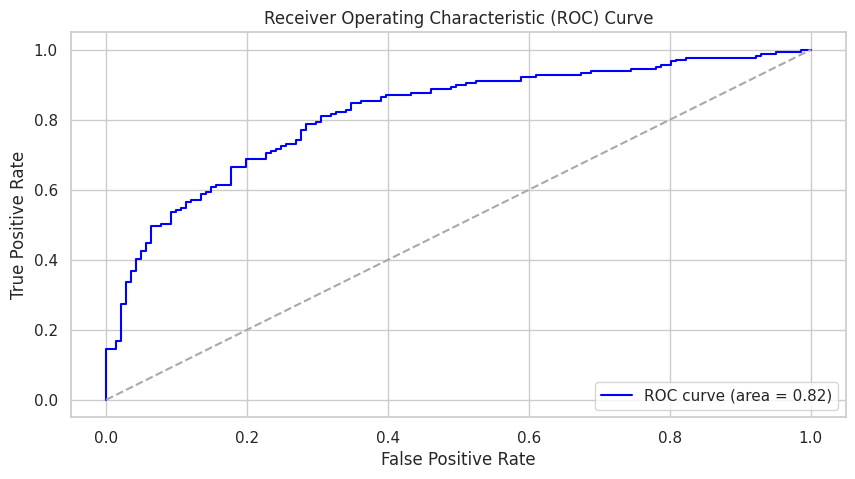

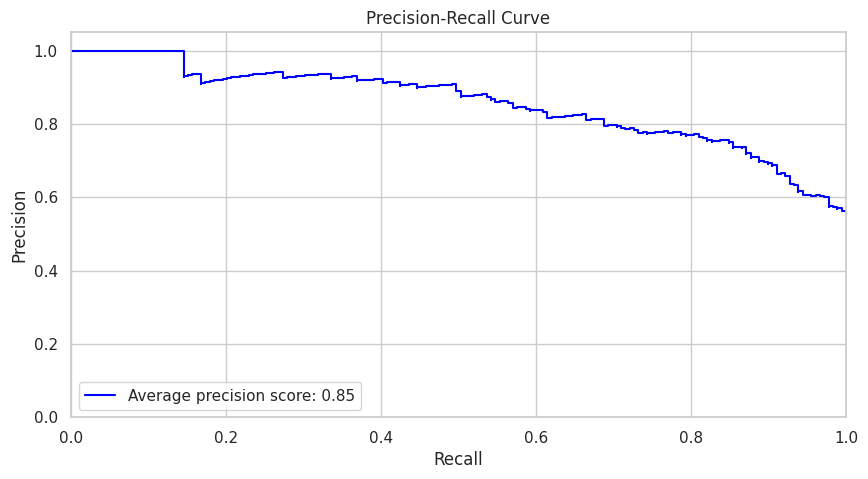

,Metric,Value
0,Accuracy,0.73125
1,Confusion Matrix,"[[106, 35], [51, 128]]"
2,Sensitivity,0.715084
3,Specificity,0.751773
4,VPP,0.785276
5,VPN,0.675159
6,MCC,0.463635
7,AUROC,0.817069
8,AUPRC,0.85485


In [23]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, precision_recall_curve, roc_auc_score, roc_curve, matthews_corrcoef,roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.calibration import CalibratedClassifierCV

# Crear un modelo SVM para usar con RFE
svm_for_rfe = SVC(kernel="linear")

# Crear el selector RFE con el modelo SVM, seleccionando un número de características
rfe_selector = RFE(svm_for_rfe, n_features_to_select=5, step=1)

# Ajustar RFE al conjunto de entrenamiento
rfe_selector.fit(X_train, y_train)

# Características seleccionadas por RFE
features_selected_rfe = X_train.columns[rfe_selector.support_].tolist()

# Entrenar el clasificador SVM con las características seleccionadas
svm_classifier = SVC(kernel="linear", probability=True)
calibrated_svm = CalibratedClassifierCV(svm_classifier)
calibrated_svm.fit(X_train[features_selected_rfe], y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = calibrated_svm.predict(X_test[features_selected_rfe])

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
f1 = f1_score(y_test, y_pred)
sensitivity = tp / (tp + fn)  # Sensibilidad (Recall)
specificity = tn / (tn + fp)  # Especificidad
vpp = tp / (tp + fp)  # Valor Predictivo Positivo (Precision)
vpn = tn / (tn + fn)  # Valor Predictivo Negativo
mcc = matthews_corrcoef(y_test, y_pred)  # MCC
auroc = roc_auc_score(y_test, y_pred_proba)  # AUROC
auprc = average_precision_score(y_test, y_pred_proba)  # AUPRC

# Almacenar las métricas en un DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Confusion Matrix', 'Sensitivity', 'Specificity', 'VPP', 'VPN', 'MCC', 'AUROC', 'AUPRC'],
    'Value': [accuracy, conf_matrix, sensitivity, specificity, vpp, vpn, mcc, auroc, auprc]
})


# Imprimir métricas
#print(f"Accuracy: {accuracy:.4f}")
#print(f"Confusion Matrix:\n{conf_matrix}")
#print(f"F1 Score: {f1:.4f}")
#print(f"Sensitivity (Recall): {sensitivity:.4f}")
#print(f"Specificity: {specificity:.4f}")
#print(f"VPP (Positive Predictive Value): {vpp:.4f}")
#print(f"VPN (Negative Predictive Value): {vpn:.4f}")
#print(f"MCC (Matthews Correlation Coefficient): {mcc:.4f}")
#print(f"AUROC (Area Under the ROC Curve): {auroc:.4f}")
#print(f"AUPRC (Area Under the Precision-Recall Curve): {auprc:.4f}")


# Calcular los valores para la Curva ROC
y_pred_proba = calibrated_svm.predict_proba(X_test[features_selected_rfe])[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Graficar la Curva ROC
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Calcular los valores para la Curva de Precisión-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

# Graficar la Curva de Precisión-Recall
plt.figure(figsize=(10, 5))
plt.step(recall, precision, where='post', color='blue', label=f'Average precision score: {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


metrics_df

## RFE Y XGBOOST

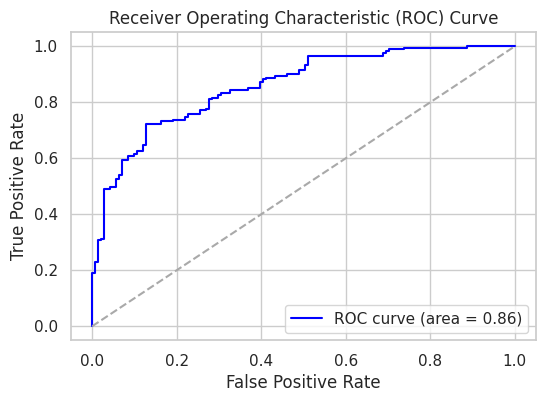

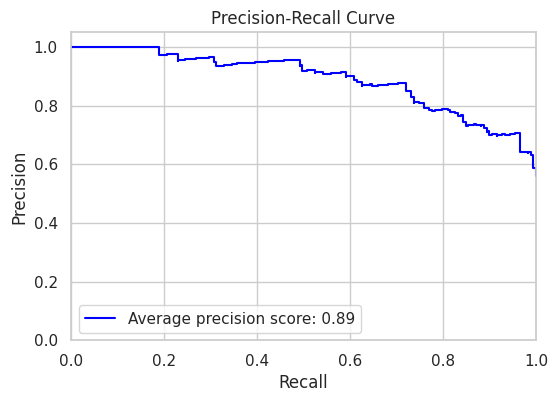

,Metric,Value
0,Accuracy,0.759375
1,Confusion Matrix,"[[102, 39], [38, 141]]"
2,Sensitivity,0.787709
3,Specificity,0.723404
4,VPP,0.783333
5,VPN,0.728571
6,MCC,0.511509
7,AUROC,0.817069
8,AUPRC,0.85485


In [24]:
from xgboost import XGBClassifier

# Crear un modelo XGB para usar con RFE
xgb_for_rfe = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Crear el selector RFE con el modelo XGB, seleccionando un número de características
rfe_selector_xgb = RFE(xgb_for_rfe, n_features_to_select=5, step=1)

# Ajustar RFE al conjunto de entrenamiento
rfe_selector_xgb.fit(X_train, y_train)

# Características seleccionadas por RFE con XGB
features_selected_rfe_xgb = X_train.columns[rfe_selector_xgb.support_].tolist()

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Entrenar el clasificador XGBoost con las características seleccionadas
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X_train[features_selected_rfe_xgb], y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = xgb_classifier.predict(X_test[features_selected_rfe_xgb])

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
f1 = f1_score(y_test, y_pred)
sensitivity = tp / (tp + fn)  # Sensibilidad (Recall)
specificity = tn / (tn + fp)  # Especificidad
vpp = tp / (tp + fp)  # Valor Predictivo Positivo (Precision)
vpn = tn / (tn + fn)  # Valor Predictivo Negativo
mcc = matthews_corrcoef(y_test, y_pred)  # MCC
auroc = roc_auc_score(y_test, y_pred_proba)  # AUROC
auprc = average_precision_score(y_test, y_pred_proba)  # AUPRC

# Almacenar las métricas en un DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Confusion Matrix', 'Sensitivity', 'Specificity', 'VPP', 'VPN', 'MCC', 'AUROC', 'AUPRC'],
    'Value': [accuracy, conf_matrix, sensitivity, specificity, vpp, vpn, mcc, auroc, auprc]
})


# Imprimir métricas
#print(f"Accuracy: {accuracy:.4f}")
#print(f"Confusion Matrix:\n{conf_matrix}")
#print(f"F1 Score: {f1:.4f}")
#print(f"Sensitivity (Recall): {sensitivity:.4f}")
#print(f"Specificity: {specificity:.4f}")
#print(f"VPP (Positive Predictive Value): {vpp:.4f}")
#print(f"VPN (Negative Predictive Value): {vpn:.4f}")
#print(f"MCC (Matthews Correlation Coefficient): {mcc:.4f}")
#print(f"AUROC (Area Under the ROC Curve): {auroc:.4f}")
#print(f"AUPRC (Area Under the Precision-Recall Curve): {auprc:.4f}")

from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calcular los valores para la Curva ROC
y_pred_proba = xgb_classifier.predict_proba(X_test[features_selected_rfe_xgb])[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Graficar la Curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Calcular los valores para la Curva de Precisión-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

# Graficar la Curva de Precisión-Recall
plt.figure(figsize=(6, 4))
plt.step(recall, precision, where='post', color='blue', label=f'Average precision score: {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

metrics_df


## BORUTA CON XGBOOST

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	7
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	5
Rejected: 	1
Iteration:

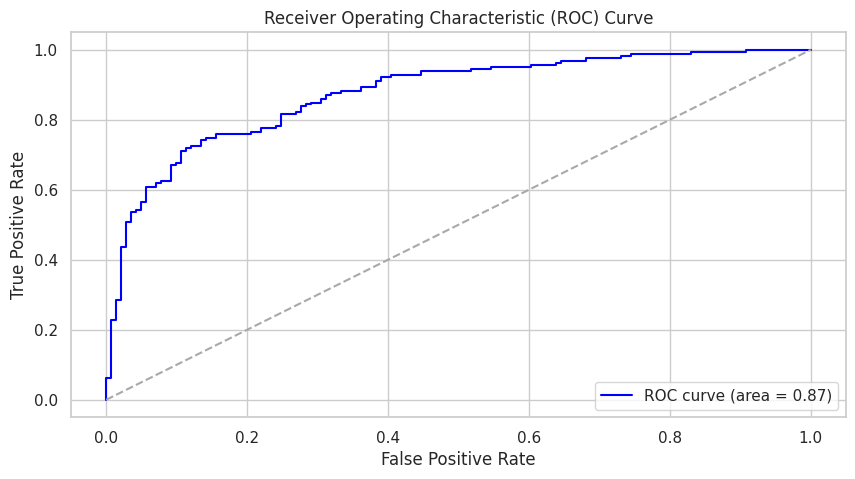

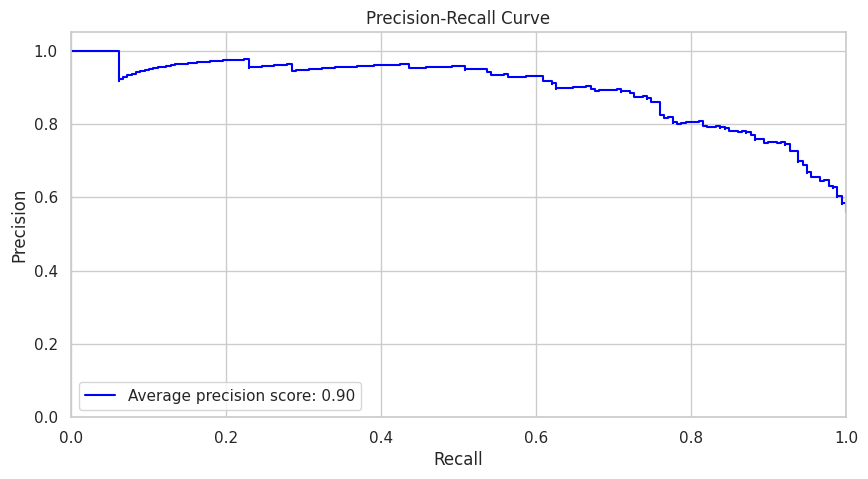

,Metric,Value
0,Accuracy,0.78125
1,Confusion Matrix,"[[104, 37], [33, 146]]"
2,Sensitivity,0.815642
3,Specificity,0.737589
4,VPP,0.797814
5,VPN,0.759124
6,MCC,0.555082
7,AUROC,0.858988
8,AUPRC,0.889408


In [25]:
from boruta import BorutaPy
from xgboost import XGBClassifier
import pandas as pd


# Inicializar el clasificador XGB para Boruta
xgb_for_boruta = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Inicializar Boruta
boruta_selector = BorutaPy(xgb_for_boruta, n_estimators='auto', random_state=42, verbose=2, max_iter=100)

# Ajustar Boruta (seleccionador de características)
boruta_selector.fit(X_train.values, y_train.values)

# Características seleccionadas por Boruta
features_selected_boruta = X_train.columns[boruta_selector.support_].tolist()

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Entrenar el clasificador XGBoost con las características seleccionadas
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X_train[features_selected_boruta].values, y_train.values)

# Hacer predicciones en el conjunto de prueba
y_pred = xgb_classifier.predict(X_test[features_selected_boruta].values)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
f1 = f1_score(y_test, y_pred)
sensitivity = tp / (tp + fn)  # Sensibilidad (Recall)
specificity = tn / (tn + fp)  # Especificidad
vpp = tp / (tp + fp)  # Valor Predictivo Positivo (Precision)
vpn = tn / (tn + fn)  # Valor Predictivo Negativo
mcc = matthews_corrcoef(y_test, y_pred)  # MCC
auroc = roc_auc_score(y_test, y_pred_proba)  # AUROC
auprc = average_precision_score(y_test, y_pred_proba)  # AUPRC

# Almacenar las métricas en un DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Confusion Matrix', 'Sensitivity', 'Specificity', 'VPP', 'VPN', 'MCC', 'AUROC', 'AUPRC'],
    'Value': [accuracy, conf_matrix, sensitivity, specificity, vpp, vpn, mcc, auroc, auprc]
})


# Imprimir métricas
#print(f"Accuracy: {accuracy:.4f}")
#print(f"Confusion Matrix:\n{conf_matrix}")
#print(f"F1 Score: {f1:.4f}")
#print(f"Sensitivity (Recall): {sensitivity:.4f}")
#print(f"Specificity: {specificity:.4f}")
#print(f"VPP (Positive Predictive Value): {vpp:.4f}")
#print(f"VPN (Negative Predictive Value): {vpn:.4f}")
#print(f"MCC (Matthews Correlation Coefficient): {mcc:.4f}")
#print(f"AUROC (Area Under the ROC Curve): {auroc:.4f}")
#print(f"AUPRC (Area Under the Precision-Recall Curve): {auprc:.4f}")


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Calcular los valores para la Curva ROC
y_pred_proba = xgb_classifier.predict_proba(X_test[features_selected_boruta].values)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Graficar la Curva ROC
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Calcular los valores para la Curva de Precisión-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

# Graficar la Curva de Precisión-Recall
plt.figure(figsize=(10, 5))
plt.step(recall, precision, where='post', color='blue', label=f'Average precision score: {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

metrics_df

## BORUTA CON RANDOM FOREST

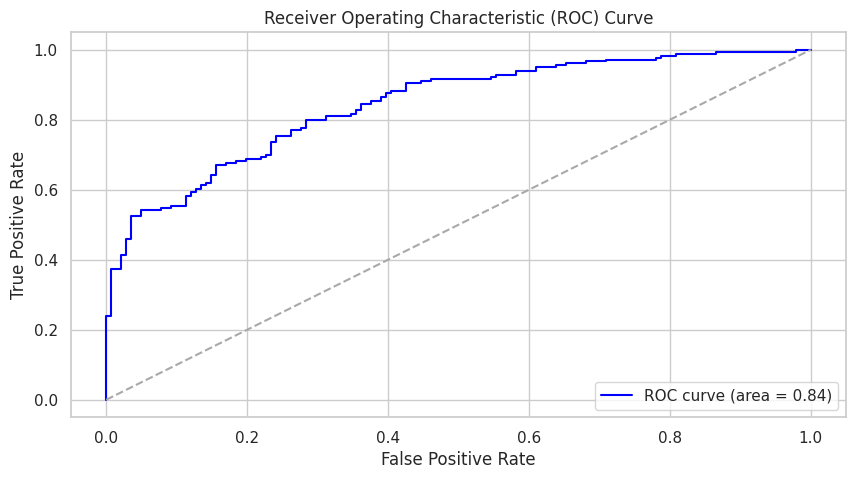

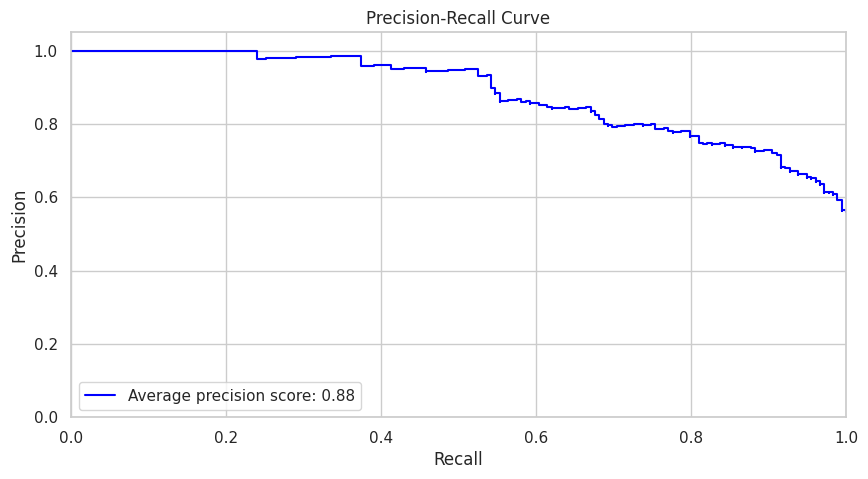

,Metric,Value
0,Accuracy,0.746875
1,Confusion Matrix,"[[108, 33], [48, 131]]"
2,Sensitivity,0.731844
3,Specificity,0.765957
4,VPP,0.79878
5,VPN,0.692308
6,MCC,0.494433
7,AUROC,0.874401
8,AUPRC,0.8971


In [26]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

# Inicializar el clasificador de Random Forest para Boruta
rf_for_boruta = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# Inicializar Boruta
boruta_selector = BorutaPy(rf_for_boruta, n_estimators='auto', random_state=42, max_iter=100)

# Ajustar Boruta (seleccionador de características)
boruta_selector.fit(X_train.values, y_train.values)

# Características seleccionadas por Boruta
features_selected_boruta = X_train.columns[boruta_selector.support_].tolist()

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Entrenar el clasificador RandomForest con las características seleccionadas
rf_classifier = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
rf_classifier.fit(X_train[features_selected_boruta].values, y_train.values)

# Hacer predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test[features_selected_boruta].values)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
f1 = f1_score(y_test, y_pred)
sensitivity = tp / (tp + fn)  # Sensibilidad (Recall)
specificity = tn / (tn + fp)  # Especificidad
vpp = tp / (tp + fp)  # Valor Predictivo Positivo (Precision)
vpn = tn / (tn + fn)  # Valor Predictivo Negativo
mcc = matthews_corrcoef(y_test, y_pred)  # MCC
auroc = roc_auc_score(y_test, y_pred_proba)  # AUROC
auprc = average_precision_score(y_test, y_pred_proba)  # AUPRC

# Almacenar las métricas en un DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Confusion Matrix', 'Sensitivity', 'Specificity', 'VPP', 'VPN', 'MCC', 'AUROC', 'AUPRC'],
    'Value': [accuracy, conf_matrix, sensitivity, specificity, vpp, vpn, mcc, auroc, auprc]
})

# Imprimir métricas
#print(f"Accuracy: {accuracy:.4f}")
#print(f"Confusion Matrix:\n{conf_matrix}")
#print(f"F1 Score: {f1:.4f}")
#print(f"Sensitivity (Recall): {sensitivity:.4f}")
#print(f"Specificity: {specificity:.4f}")
#print(f"VPP (Positive Predictive Value): {vpp:.4f}")
#print(f"VPN (Negative Predictive Value): {vpn:.4f}")
#print(f"MCC (Matthews Correlation Coefficient): {mcc:.4f}")
#print(f"AUROC (Area Under the ROC Curve): {auroc:.4f}")
#print(f"AUPRC (Area Under the Precision-Recall Curve): {auprc:.4f}")


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import numpy as np

# Calcular los valores para la Curva ROC
y_pred_proba = rf_classifier.predict_proba(X_test[features_selected_boruta].values)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Graficar la Curva ROC
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Calcular los valores para la Curva de Precisión-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

# Graficar la Curva de Precisión-Recall
plt.figure(figsize=(10, 5))
plt.step(recall, precision, where='post', color='blue', label=f'Average precision score: {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

metrics_df

# Algoritmo seleccionado

## RFE CON RANDOM FOREST

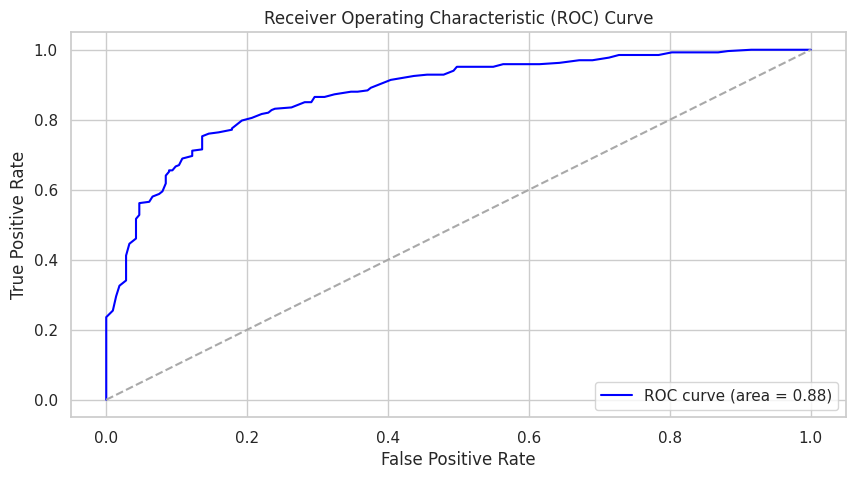

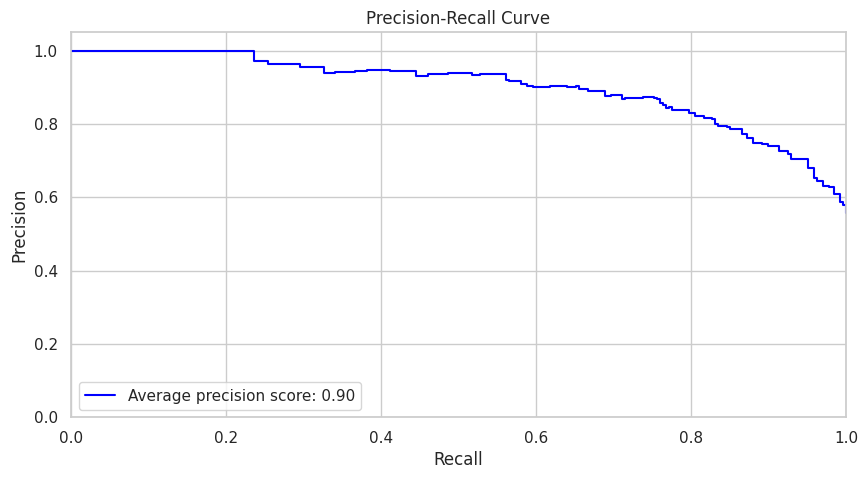

,Metric,Value
0,Accuracy,0.8
1,Confusion Matrix,"[[166, 47], [49, 218]]"
2,Sensitivity,0.816479
3,Specificity,0.779343
4,VPP,0.822642
5,VPN,0.772093
6,MCC,0.595278
7,AUROC,0.877081
8,AUPRC,0.901219


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import (
    accuracy_score, confusion_matrix, f1_score, recall_score,
    precision_score, roc_auc_score, average_precision_score,
    matthews_corrcoef, precision_recall_curve, roc_curve, auc
)
from sklearn.preprocessing import StandardScaler

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear una instancia de StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Selección de características con RFECV
rf_for_rfe = RandomForestClassifier(random_state=42)

# Entrenamiento del modelo de Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
# Crear un modelo de Random Forest para usar con RFE
rf_for_rfe = RandomForestClassifier()

# Crear el selector RFE con el modelo de Random Forest y validación cruzada
rfe = RFECV(rf_for_rfe, step=1, cv=5)

# Ajustar RFE al conjunto de entrenamiento
rfe.fit(X_train_scaled, y_train)


# Crear el selector RFE con el modelo de Random Forest y validación cruzada
rfe_selector_rf = RFECV(rf_for_rfe, step=1, cv=5)

# Ajustar RFE al conjunto de entrenamiento
rfe_selector_rf.fit(X_train, y_train)

# Características seleccionadas por RFE con Random Forest
features_selected_rfe_rf = X_train.columns[rfe_selector_rf.support_].tolist()

# Entrenar el clasificador Random Forest con las características seleccionadas
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train[features_selected_rfe_rf], y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test[features_selected_rfe_rf])

# Obtener las probabilidades para la clase positiva
y_pred_proba = rf_classifier.predict_proba(X_test[features_selected_rfe_rf])[:, 1]

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
f1 = f1_score(y_test, y_pred)
sensitivity = tp / (tp + fn)  # Sensibilidad (Recall)
specificity = tn / (tn + fp)  # Especificidad
vpp = tp / (tp + fp)  # Valor Predictivo Positivo (Precision)
vpn = tn / (tn + fn)  # Valor Predictivo Negativo
mcc = matthews_corrcoef(y_test, y_pred)  # MCC
auroc = roc_auc_score(y_test, y_pred_proba)  # AUROC
auprc = average_precision_score(y_test, y_pred_proba)  # AUPRC

# Almacenar las métricas en un DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Confusion Matrix', 'Sensitivity', 'Specificity', 'VPP', 'VPN', 'MCC', 'AUROC', 'AUPRC'],
    'Value': [accuracy, conf_matrix, sensitivity, specificity, vpp, vpn, mcc, auroc, auprc]
})

# Imprimir métricas
#print(f"Accuracy: {accuracy:.4f}")
#print(f"Confusion Matrix:\n{conf_matrix}")
#print(f"F1 Score: {f1:.4f}")
#print(f"Sensitivity (Recall): {sensitivity:.4f}")
#print(f"Specificity: {specificity:.4f}")
#print(f"VPP (Positive Predictive Value): {vpp:.4f}")
#print(f"VPN (Negative Predictive Value): {vpn:.4f}")
#print(f"MCC (Matthews Correlation Coefficient): {mcc:.4f}")
#print(f"AUROC (Area Under the ROC Curve): {auroc:.4f}")
#print(f"AUPRC (Area Under the Precision-Recall Curve): {auprc:.4f}")


# Calcular los valores para la Curva ROC
y_pred_proba = rf_classifier.predict_proba(X_test[features_selected_rfe_rf])[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Graficar la Curva ROC
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Calcular los valores para la Curva de Precisión-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

# Graficar la Curva de Precisión-Recall
plt.figure(figsize=(10, 5))
plt.step(recall, precision, where='post', color='blue', label=f'Average precision score: {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

metrics_df


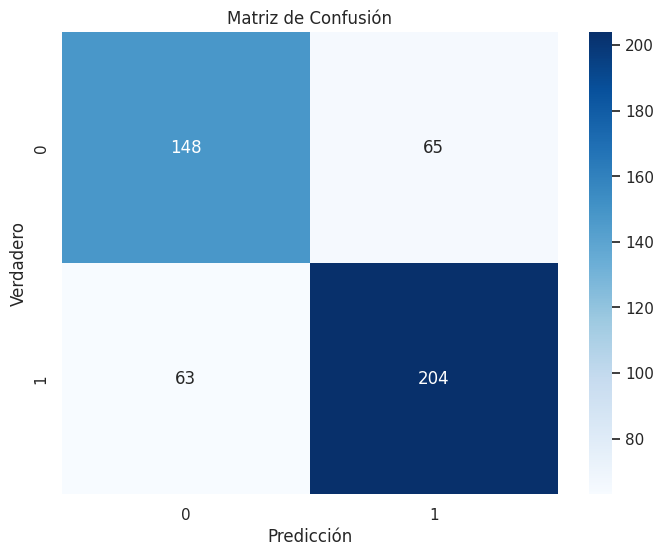

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Suponiendo que y_test son tus etiquetas verdaderas y y_pred son las predicciones del modelo
cm = confusion_matrix(y_test, y_pred)

# Crear una figura de matplotlib
plt.figure(figsize=(8, 6))

# Usar Seaborn para crear un mapa de calor
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')

# Mostrar la gráfica
plt.show()


In [29]:
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Defining the parameter space for the Bayesian optimization
param_space = {
    'n_estimators': Integer(100, 1000),
    'max_depth': Integer(1, 50),
    'min_samples_split': Real(0.1, 1.0),
    'min_samples_leaf': Integer(1, 10),
    'max_features': Real(0.1, 1.0)
}

# Bayesian optimization using BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    search_spaces=param_space,
    n_iter=30,  # number of iterations
    cv=3,       # 3-fold cross-validation
    n_jobs=-1,  # use all available cores
    random_state=42
)

# Fitting the BayesSearchCV to the scaled data (before feature selection)
bayes_search.fit(X_train[features_selected_rfe_rf], y_train)

# Best parameters found by BayesSearchCV
best_params = bayes_search.best_params_
best_score = bayes_search.best_score_

#best_params, best_score



print("Mejores parámetros:", best_params)
print("Mejor puntuación:", best_score)

# Entrenar el modelo RandomForest con los mejores parámetros
rf_model = RandomForestClassifier(**best_params, random_state=42)
rf_model.fit(X_train[features_selected_rfe_rf], y_train)

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Mejores parámetros: OrderedDict([('max_depth', 38), ('max_features', 0.1), ('min_samples_leaf', 7), ('min_samples_split', 0.1), ('n_estimators', 1000)])
Mejor puntuación: 0.7640750670241286


RandomForestClassifier(max_depth=38, max_features=0.1, min_samples_leaf=7,
                       min_samples_split=0.1, n_estimators=1000,
                       random_state=42)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, f1_score, matthews_corrcoef,
    roc_auc_score, average_precision_score
)


# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test[features_selected_rfe_rf])
y_pred_proba = rf_model.predict_proba(X_test[features_selected_rfe_rf])[:, 1]

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
f1 = f1_score(y_test, y_pred)
sensitivity = tp / (tp + fn)  # Sensibilidad (Recall)
specificity = tn / (tn + fp)  # Especificidad
vpp = tp / (tp + fp)  # Valor Predictivo Positivo (Precision)
vpn = tn / (tn + fn)  # Valor Predictivo Negativo
mcc = matthews_corrcoef(y_test, y_pred)  # MCC
auroc = roc_auc_score(y_test, y_pred_proba)  # AUROC
auprc = average_precision_score(y_test, y_pred_proba)  # AUPRC

# Almacenar las métricas en un DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Confusion Matrix', 'Sensitivity', 'Specificity', 'VPP', 'VPN', 'MCC', 'AUROC', 'AUPRC'],
    'Value': [accuracy, conf_matrix.tolist(), sensitivity, specificity, vpp, vpn, mcc, auroc, auprc]
})

metrics_df


             Metric                   Value
0          Accuracy                0.733333
1  Confusion Matrix  [[148, 65], [63, 204]]
2       Sensitivity                0.764045
3       Specificity                0.694836
4               VPP                0.758364
5               VPN                0.701422
6               MCC                0.459333
7             AUROC                0.806967
8             AUPRC                0.841289


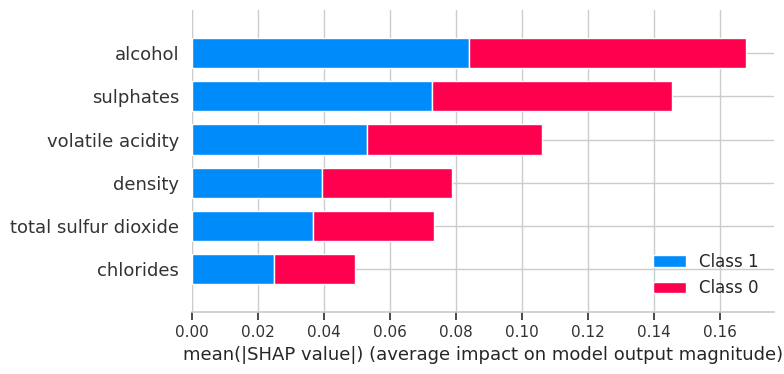

In [32]:
import shap

# Asumiendo que rf_model es tu modelo RandomForest entrenado y X_test es tu conjunto de prueba
# Inicializar el explainer de SHAP para el modelo
explainer = shap.TreeExplainer(rf_model)

# Calcular los valores SHAP para el conjunto de prueba
shap_values = explainer.shap_values(X_test[features_selected_rfe_rf])

# Visualización: Resumen de los valores SHAP
shap.summary_plot(shap_values, X_test[features_selected_rfe_rf], feature_names=features_selected_rfe_rf)

# Otras visualizaciones, como el diagrama de abejas, también pueden ser útiles
# shap.summary_plot(shap_values, X_test[features_selected_rfe_rf], feature_names=features_selected_rfe_rf, plot_type="bar")


# Características Seleccionadas

In [33]:
import pandas as pd
# features_selected_rfe_svm (RFE con SVM)
# features_selected_rfe_rf (RFE con Random Forest)
# features_selected_rfe_xgb (RFE con XGBoost)
# features_selected_boruta_rf (Boruta con Random Forest)
# features_selected_boruta_xgb (Boruta con XGBoost)

features_df = pd.DataFrame(index=X_train.columns)

# Añadir las selecciones de características para cada método

features_df['RFE with SVM'] = features_df.index.isin(features_selected_rfe).astype(int)
features_df['RFE with Random Forest'] = features_df.index.isin(features_selected_rfe_rf).astype(int)
features_df['RFE with XGBoost'] = features_df.index.isin(features_selected_rfe_xgb).astype(int)
features_df['RFE with Random Forest'] = features_df.index.isin(features_selected_rfe_rf).astype(int)
features_df['Boruta with XGBoost'] = features_df.index.isin(features_selected_boruta).astype(int)

# Reemplazar 0 con '' y 1 con 'X' para una mejor visualización
features_df = features_df.replace({0: '', 1: 'X'})


In [34]:
features_df['Total Selections'] = features_df.sum(axis=1)

# Ordenar las características por el número total de selecciones
sorted_features = features_df.sort_values(by='Total Selections', ascending=False)

# Mostrar las características con el mayor número de selecciones
sorted_features

,RFE with SVM,RFE with Random Forest,RFE with XGBoost,Boruta with XGBoost,Total Selections
volatile acidity,X,X,X,X,XXXX
chlorides,X,X,X,X,XXXX
total sulfur dioxide,X,X,X,X,XXXX
sulphates,X,X,X,X,XXXX
alcohol,X,X,X,X,XXXX
density,,X,,X,XX
fixed acidity,,,,X,X
citric acid,,,,X,X
residual sugar,,,,X,X
free sulfur dioxide,,,,X,X


# Tablas

In [37]:
import pandas as pd

# Datos de los reportes de los modelos
data = {
    'Metric': ['Accuracy', 'Confusion Matrix', 'Sensitivity', 'Specificity', 'VPP', 'VPN', 'MCC', 'AUROC', 'AUPRC'],
    'SVM': [0.75, '[[105, 36], [44, 135]]', 0.75419, 0.744681, 0.789474, 0.704698, 0.496516, 0.833214, 0.874936],
    'XGBoost': [0.75, '[[105, 36], [44, 135]]', 0.75419, 0.744681, 0.789474, 0.704698, 0.496516, 0.833214, 0.874936],
    'Random Forest': [0.75, '[[105, 36], [44, 135]]', 0.75419, 0.744681, 0.789474, 0.704698, 0.496516, 0.833214, 0.874936]
}

# Crear un DataFrame con los datos
report_df = pd.DataFrame(data)

# Establecer 'Metric' como el índice
report_df.set_index('Metric', inplace=True)
report_df.columns.name = "Reportes de Modelos para Datos en Bruto"

report_df


Reportes de Modelos para Datos en Bruto,SVM,XGBoost,Random Forest
Metric,,,
Accuracy,0.75,0.75,0.75
Confusion Matrix,"[[105, 36], [44, 135]]","[[105, 36], [44, 135]]","[[105, 36], [44, 135]]"
Sensitivity,0.75419,0.75419,0.75419
Specificity,0.744681,0.744681,0.744681
VPP,0.789474,0.789474,0.789474
VPN,0.704698,0.704698,0.704698
MCC,0.496516,0.496516,0.496516
AUROC,0.833214,0.833214,0.833214
AUPRC,0.874936,0.874936,0.874936


In [36]:
import pandas as pd

# Datos de los modelos sin selección de atributos
data_no_selection = {
    'Métrica': ['Accuracy', 'F1 Score', 'Sensitivity', 'Specificity', 'VPP', 'VPN', 'MCC', 'AUROC', 'AUPRC'],
    'SVM': [0.7500, 0.7714, 0.7542, 0.7447, 0.7895, 0.7047, 0.4965, 0.8332, 0.8749],
    'XGB': [0.7812, 0.8066, 0.8156, 0.7376, 0.7978, 0.7591, 0.5551, 0.8744, 0.8971],
    'RF': [0.7812, 0.8066, 0.8156, 0.7376, 0.7978, 0.7591, 0.5551, 0.8744, 0.8971]
}

df_no_selection = pd.DataFrame(data_no_selection)

# Datos de los modelos con selección de atributos
data_with_selection = {
    'Métrica': ['Accuracy', 'F1 Score', 'Sensitivity', 'Specificity', 'VPP', 'VPN', 'MCC', 'AUROC', 'AUPRC'],
    'RFE-SVM': [0.73125, 0.7485, 0.7151, 0.7518, 0.7853, 0.6752, 0.4636, 0.8171, 0.8549],
    'RFE-XGB': [0.7594, 0.7855, 0.7877, 0.7234, 0.7833, 0.7286, 0.5115, 0.8590, 0.8894],
    'RFE-RF': [0.7719, 0.7955, 0.7933, 0.7447, 0.7978, 0.7394, 0.5376, 0.8590, 0.8894],
    'Boruta-RF': [0.7344, 0.7478, 0.7039, 0.7730, 0.7975, 0.6728, 0.4736, 0.8887, 0.9162],
    'Boruta-XGB': [0.7812, 0.8066, 0.8156, 0.7376, 0.7978, 0.7591, 0.5551, 0.8446, 0.8847]
}

df_with_selection = pd.DataFrame(data_with_selection)

# Imprimir DataFrames para comparación
print("Resultados sin selección de atributos:")
print(df_no_selection)

print("\nResultados con selección de atributos:")
print(df_with_selection)


Resultados sin selección de atributos:
       Métrica     SVM     XGB      RF
0     Accuracy  0.7500  0.7812  0.7812
1     F1 Score  0.7714  0.8066  0.8066
2  Sensitivity  0.7542  0.8156  0.8156
3  Specificity  0.7447  0.7376  0.7376
4          VPP  0.7895  0.7978  0.7978
5          VPN  0.7047  0.7591  0.7591
6          MCC  0.4965  0.5551  0.5551
7        AUROC  0.8332  0.8744  0.8744
8        AUPRC  0.8749  0.8971  0.8971

Resultados con selección de atributos:
       Métrica  RFE-SVM  RFE-XGB  RFE-RF  Boruta-RF  Boruta-XGB
0     Accuracy  0.73125   0.7594  0.7719     0.7344      0.7812
1     F1 Score  0.74850   0.7855  0.7955     0.7478      0.8066
2  Sensitivity  0.71510   0.7877  0.7933     0.7039      0.8156
3  Specificity  0.75180   0.7234  0.7447     0.7730      0.7376
4          VPP  0.78530   0.7833  0.7978     0.7975      0.7978
5          VPN  0.67520   0.7286  0.7394     0.6728      0.7591
6          MCC  0.46360   0.5115  0.5376     0.4736      0.5551
7        AUROC  0.8